# Logistic Regression on Marketing



### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the data
data = pd.read_csv('marketing.csv')

In [4]:
data

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671


### Data Cleaning

In [5]:
data = data.dropna()

In [7]:
data.isnull()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
991,False,False,False,False,False,False,False,False,False,False
993,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
dtype: int64

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
991    False
993    False
997    False
998    False
999    False
Length: 697, dtype: bool

In [10]:
data.nunique()

Age              3
Gender           2
OwnHome          2
Married          2
Location         2
Salary         517
Children         4
History          3
Catalogs         4
AmountSpent    621
dtype: int64

### Exploratory Data Analysis

In [11]:
data.shape

(697, 10)

In [12]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          697 non-null    object
 1   Gender       697 non-null    object
 2   OwnHome      697 non-null    object
 3   Married      697 non-null    object
 4   Location     697 non-null    object
 5   Salary       697 non-null    int64 
 6   Children     697 non-null    int64 
 7   History      697 non-null    object
 8   Catalogs     697 non-null    int64 
 9   AmountSpent  697 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 59.9+ KB


In [14]:
data.describe()

,Salary,Children,Catalogs,AmountSpent
count,697.000000,697.000000,697.000000,697.000000
mean,58054.662841,0.901004,15.107604,1206.714491
std,30703.954577,1.045082,6.607307,1000.321680
min,10100.000000,0.000000,6.000000,38.000000
25%,33200.000000,0.000000,12.000000,472.000000
50%,55200.000000,1.000000,12.000000,918.000000
75%,79900.000000,2.000000,18.000000,1702.000000
max,168800.000000,3.000000,24.000000,6217.000000


In [16]:
print(data['Age'].value_counts())  # Check the distribution of the 'Age' column

Middle    363
Old       169
Young     165
Name: Age, dtype: int64


In [17]:
print(data['Gender'].value_counts())  # Check the distribution of the 'Gender' column

Female    357
Male      340
Name: Gender, dtype: int64


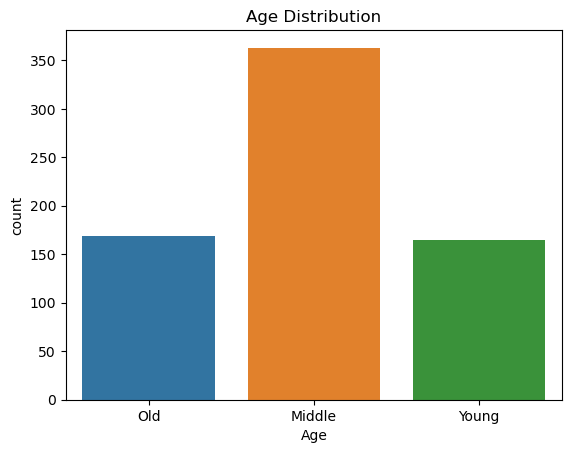

In [18]:
sns.countplot(x='Age', data=data)
plt.title('Age Distribution')
plt.show()

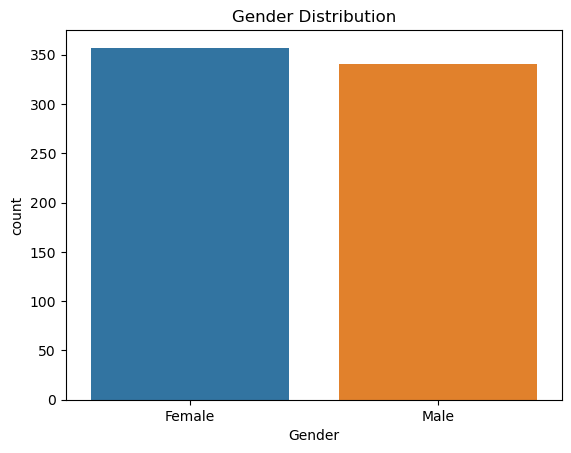

In [19]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

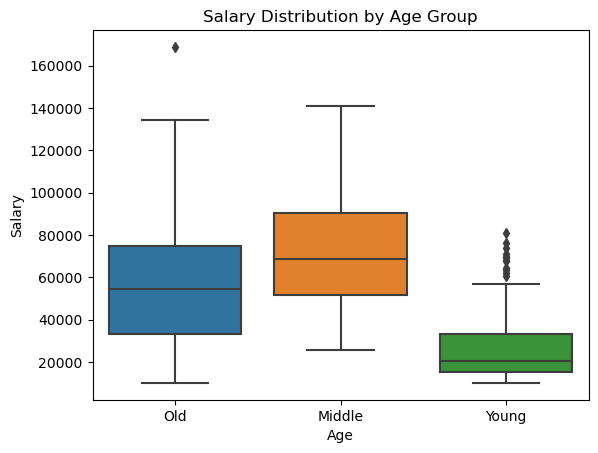

In [20]:
sns.boxplot(x='Age', y='Salary', data=data)
plt.title('Salary Distribution by Age Group')
plt.show()


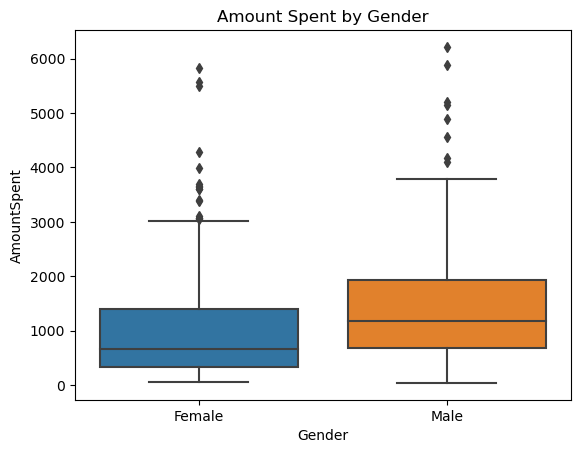

In [21]:
sns.boxplot(x='Gender', y='AmountSpent', data=data)
plt.title('Amount Spent by Gender')
plt.show()

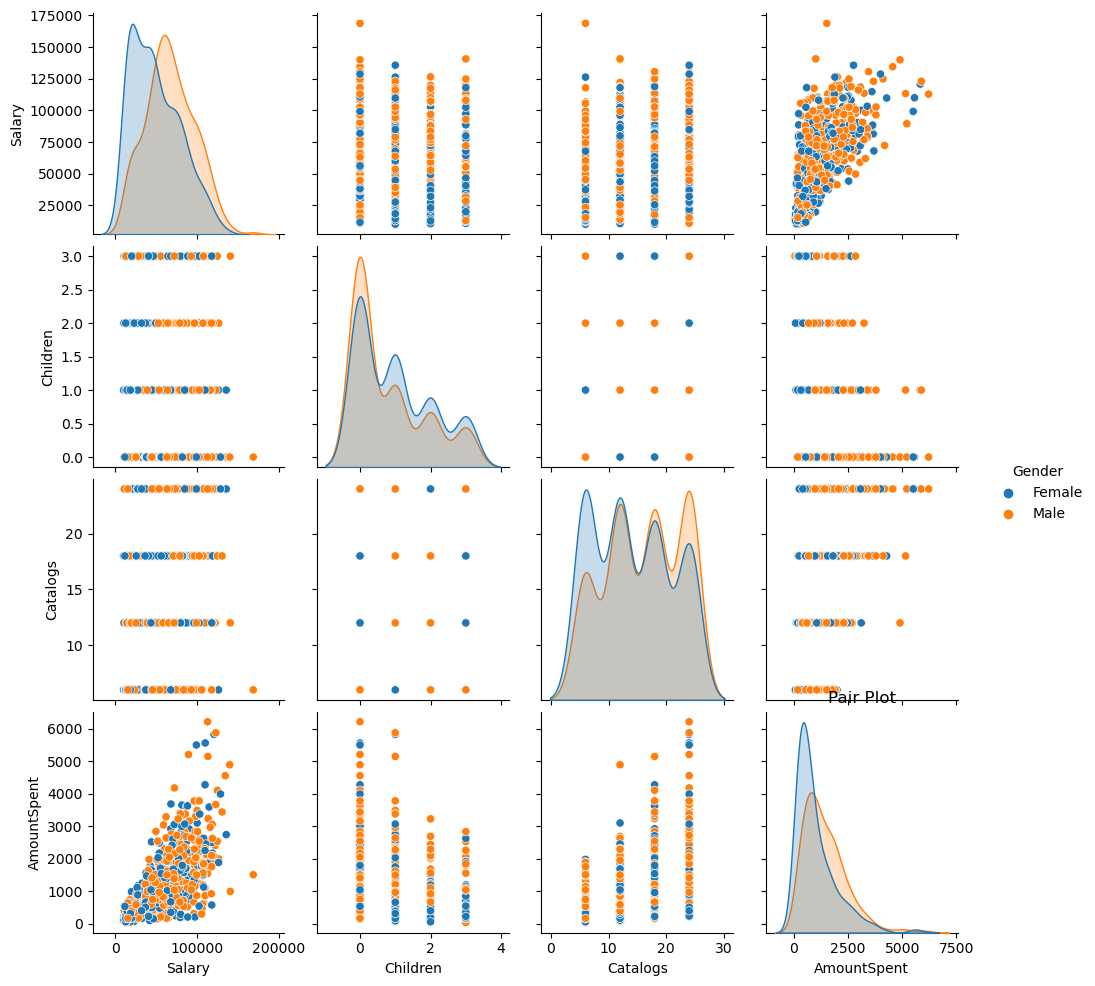

In [22]:
sns.pairplot(data, hue='Gender', diag_kind='kde')
plt.title('Pair Plot')
plt.show()

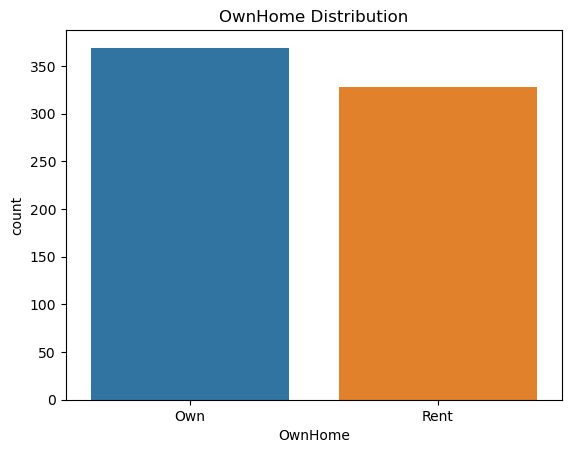

In [23]:
sns.countplot(x='OwnHome', data=data)
plt.title('OwnHome Distribution')
plt.show()

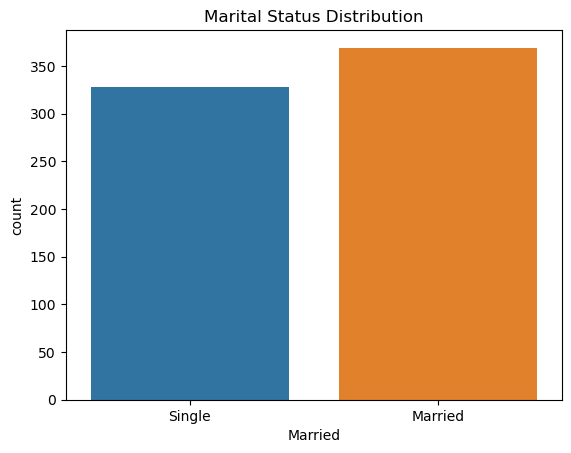

In [24]:
sns.countplot(x='Married', data=data)
plt.title('Marital Status Distribution')
plt.show()

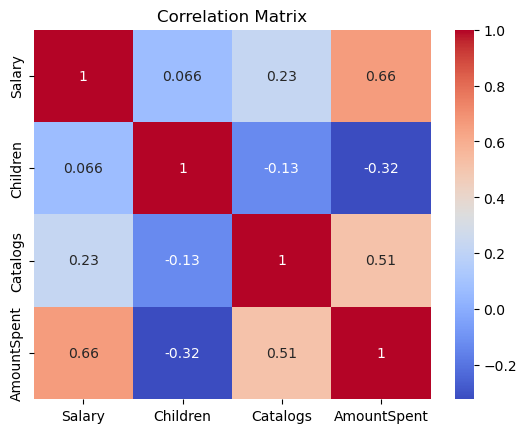

In [25]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Model training

In [26]:
X = data.drop('AmountSpent', axis=1)
y = data['AmountSpent']

In [27]:
X = pd.get_dummies(X, drop_first=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\dheer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [36]:
print(f'Accuracy: {accuracy}')

Accuracy: 96.03
